## 图像生成
#### PGAN - 人脸
#### DCGAN - 服装
https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/

In [1]:
import torch
use_gpu = True if torch.cuda.is_available() else False

In [177]:
'''
PROGRESSIVE GROWING OF GANS (PGAN)
High-quality image generation of fashion, celebrity faces
'''
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)

Using cache found in /Users/shadow/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


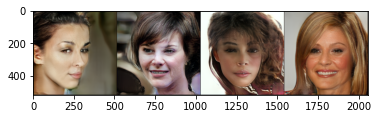

In [178]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())

In [10]:
generated_images.shape

torch.Size([4, 3, 512, 512])

In [ ]:
####

In [188]:
import torchvision.transforms as Transforms

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)

num_images = 1

def dcgan():
    noise, _ = model.buildNoiseData(num_images)
    with torch.no_grad():
        generated_images = model.test(noise)

    transform = Transforms.Compose([Transforms.Normalize((-1., -1., -1.), (2, 2, 2)),
                                    Transforms.ToPILImage()])
    generated_images = generated_images[0]
    generated_images = transform(generated_images.clamp(min=-1, max=1))
    return generated_images

Using cache found in /Users/shadow/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [207]:
im=dcgan()

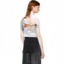

In [208]:
im

## 文本生成
#### CPM-Generate
#### gpt2-base-chinese 

In [63]:
!pip install opencc

     |████████████████████████████████| 727 kB 1.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/shadow/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [64]:
from opencc import OpenCC
s2t = OpenCC('s2t')
t2s = OpenCC('t2s')

In [37]:
from transformers import pipeline

In [210]:
generator = pipeline("text-generation", model="ckiplab/gpt2-base-chinese")
#generator = pipeline("text-generation", model="TsinghuaAI/CPM-Generate")


In [211]:
ns=[x.strip() for x in '''设计师
 老师
 司机
 程序员
 产品经理
 厨师
 作家
 无业游民
 学生
 高中生
 女生'''.split("\n")]
ns

['设计师', '老师', '司机', '程序员', '产品经理', '厨师', '作家', '无业游民', '学生', '高中生', '女生']

In [212]:
def create_text(n):
    actions=['出生','来自','毕业于','曾经','父亲是','母亲是','喜欢','觉得','想要成为','的梦想是','认为','自豪地宣布','将要']
    for a in actions:
        t=s2t.convert('我是'+n+'，我'+a)
        [text] = generator(t, max_length=100)
        s=''.join(text['generated_text'].split())
        s=t2s.convert(s)
        print(s)

In [213]:
for n in ns:
    create_text(n)
    print()

Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是设计师，我出生在台湾的家庭的生活起居、外籍女佣家庭的生活起居和婚姻关系，而家庭的生活起居和婚姻关系，我是在台的华人，她的年龄层来源于日本，目前是台湾第十三。她的年龄层为四十岁，也是在台湾的，也


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是设计师，我来自大林寺，在台北小巨蛋。因此在日本全国，.p.p.也从来没有提及过。除了..p.p.外，.p.q.p.也在日本，比皆是..而其中..4是在日本，比皆是..而其中.


KeyboardInterrupt: 

In [85]:
create_text('小狮子')

Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我出生后，就进入公学。前三名是小狮子，其中一名是小狮子，一名是小狮子，其二名是小狮子，一名是小狮子，二名是小狮子。三名是小狮子，其三名是小狮子，其三名为小狮子，其二名是小狮子，其二名是小狮


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我来自澳大利亚，我以自由基金会为基金经理人。（，），是日本乐器、作曲家、动画技术家。于1960年代开始组成乐团，曾进入日本东京国立音乐学校（今）。之后在电台担任乐


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我毕业于武汉中央文化出版社，是中国的一处出版单位。该书分为三个部分，分别为中国漫画，杂志，中国出版总公司）和中国漫画出版社（现北京市博新区中华文化出版社）。另外，《中国漫画人物》《》中


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我曾经是一名高人，被认为是一名最为著名的人。2017年1月18日，西班牙国家羽毛球队官方宣布在2018年10月21日对土耳其羽毛球公开赛中，王楠成了小狮子的双打项目的四号种子，并且获得了本赛季的最


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我父亲是一个人。可是，我也没有一个母亲；有一位小狮子是一个男孩。是指人，其子女可能有不同的父亲或同母异家，与亲兄分家（除小狮子和其他同姓）之后，其子女可以从小狮子一侧向外寻亲，或成


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我母亲是小狮子，他是天狼星，他可以是小狮子，母亲是小狮子，他是小狮子。是一个非常重要的视频，用于发送数据。这用于支持信息、广播、广播和广播电台。它包含一个叫的广播器，用于提供广播和广


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我喜欢你你，在中国的女学生，他们只有四岁，当她小时候是个小朋友，并说她喜欢你，当我小时候是个小宝贝，有时小宝贝就像小一样，当然可以。我喜欢你，但是觉得我喜欢你。当然，我喜欢小一点，


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我觉得是日常生活的，看这一切正当的事。就这本书这样，李明通便成了一个明治时代的一个有效。一个说明是说明了当时的人民的生活方式、政治方式、情况、资源问题、社会问题以及宗教问题。在台湾，有


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我想要成为这个名字，就是「狮子的生命」，当这个暱称被发现时，他把一句名字「当成是「你的兄弟」。其后他在小狮子的母亲的帮助下开始他的第二次旅行，小狮子和小狮子分别住从波士顿。他的母亲也成了那


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我的梦想是由在西门答腊国王阿里斯的领导下，西门答腊方面对东门答腊和雅典是双赢的。这个时候他在王子的领导下成为阿里斯国王。因为他认为在这种领导下，他的儿子就是雅典人，是雅典人。因为他们的儿


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我认为是金子。在上代时，金子都以此称呼金子，而小狮子也以此称呼。根据《金子纪》记载，其大小狮子在小狮子以外则称作小狮子。从小狮子称呼的时候，牠们称呼比喻「金」，这种现象在所取得，不如说其


Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


我是小狮子，我自豪地宣布了将来她成为一名义的歌手。在小学三年级时，小狮子的原声带就是同性恋。小狮母亲是个非同性恋的人。在1999年5月，的发布了一个的照片，并在同学们的声中被广泛使用。随后
我是小狮子，我将要再继续这样一辈子。这些都不能算是一种不小的，你必须要用对这些力量来维持不变的权力。一个特别的意义就是把这样的权力所在的所在的所在的所在的所在的所在的所在的所在的所在的所在的所在的所在


In [107]:
t=s2t.convert('作为30岁左右的男性，我很生气，因为')
[text] = generator(t, max_length=100)
s=''.join(text['generated_text'].split())
s=t2s.convert(s)
print(s)

Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


作为30岁左右的男性，我很生气，因为一个是好友」的意思，同时也是他的理想理想。在这段时间里，我相信这个男性要有好朋友，他们要求我们和我所说的人一样，为了我们的理想，我为了我们的理想，我们必须要做好他们对


## 人脸分析
https://github.com/serengil/deepface
/Users/shadow/.deepface/weights/race_model_single_batch.h5

In [87]:
!pip install deepface

     |████████████████████████████████| 61 kB 1.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 204 kB/s eta 0:00:01


  Created wheel for gdown: filename=gdown-3.13.0-py3-none-any.whl size=9033 sha256=0f65c1c205ade9cbaba5ed3e409a0c3ba742e378a0d12f305d4c04baaf7aaeee
  Stored in directory: /Users/shadow/Library/Caches/pip/wheels/2f/2a/2f/86449b6bdbaa9aef873f68332b68be6bfbc386b9219f47157d
Successfully built gdown
You should consider upgrading via the '/Users/shadow/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [88]:
from deepface import DeepFace


Directory  /Users/shadow /.deepface created
Directory  /Users/shadow /.deepface/weights created


In [220]:
labels = {'angry':'生氣', 'disgust':'厭惡', 'fear':'恐懼',
          'happy':'開心', 'neutral':'沒什麼特別表情', 
          'sad':'悲傷', 'surprise':'吃驚',
          'Man':'男', 'Woman':'女',
          'asian':'亞洲', 'black':'黑', 'indian':'印弟安',
          'latino hispanic':'拉丁美洲 (西班牙裔)', 
          'middle eastern':'中東', 'white':'白'}
def show_info(obj):
    age = obj['age']
    emotion = labels[obj['dominant_emotion']]
    race = labels[obj['dominant_race']]
    gender = labels[obj['gender']]
    text = f"這是一位 {age} 歲的{race}人{gender}子, 他感覺是{emotion}的。"
    print(text)
    return text

In [221]:
def face_read(im):
    obj = DeepFace.analyze(img_path = im, actions = ['age', 'gender', 'race', 'emotion'])
    show_info(obj)

In [218]:
obj = DeepFace.analyze(img_path = 'fcfa508ce11a3d4475f9c3c52746.jpeg', actions = ['age', 'gender', 'race', 'emotion'])




Finding actions:   0%|          | 0/4 [00:00<?, ?it/s]


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    


Action: age:  25%|██▌       | 1/4 [00:03<00:09,  3.24s/it]


Action: gender:  25%|██▌       | 1/4 [00:03<00:09,  3.24s/it]


Action: gender:  50%|█████     | 2/4 [00:03<00:04,  2.42s/it]


Action: race:  50%|█████     | 2/4 [00:03<00:04,  2.42s/it]  


Action: race:  75%|███████▌  | 3/4 [00:04<00:01,  1.81s/it]


Action: emotion:  75%|███████▌  | 3/4 [00:04<00:01,  1.81s/it]


Action: emotion: 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


In [219]:
show_info(obj)

這是一位 26 歲的亞洲人女子, 他感覺是沒什麼特別表情的。


In [223]:
face_read('77777-s.jpeg')




Finding actions:   0%|          | 0/4 [00:00<?, ?it/s]


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    


Action: age:  25%|██▌       | 1/4 [00:00<00:00,  3.98it/s]


Action: gender:  25%|██▌       | 1/4 [00:00<00:00,  3.98it/s]


Action: gender:  50%|█████     | 2/4 [00:00<00:00,  4.22it/s]


Action: race:  50%|█████     | 2/4 [00:00<00:00,  4.22it/s]  


Action: race:  75%|███████▌  | 3/4 [00:00<00:00,  4.42it/s]


Action: emotion:  75%|███████▌  | 3/4 [00:00<00:00,  4.42it/s]


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

這是一位 28 歲的白人女子, 他感覺是沒什麼特別表情的。


## 翻译
#### huggingface  
#### Helsinki-NLP/opus-mt-zh-en 
#### Helsinki-NLP/opus-mt-zh-en

In [44]:
from transformers import pipeline,AutoTokenizer, AutoModelForSeq2SeqLM,AutoModelWithLMHead

model_zh_en = AutoModelWithLMHead.from_pretrained("Helsinki-NLP/opus-mt-zh-en")
tokenizer_zh_en = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-zh-en")
translation_zh_en = pipeline("translation_zh_to_en", model=model_zh_en, tokenizer=tokenizer_zh_en)


/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/transformers/models/auto/modeling_auto.py:890: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,
Some weights of MarianMTModel were not initialized from the model checkpoint at Helsinki-NLP/opus-mt-zh-en and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [139]:
text = "转眼2021年已经过去有九个多月的时间了，这段时间里，我学会的最重要的事情是，我们所有人都不要为未到来的事情烦恼，还有最重要的是无论如何好好吃饭，好好睡觉，愿我们过好每一天，这样我们才能在一起更多天。"
translated_text = translation_zh_en(text, max_length=40)[0]['translation_text']
print(translated_text)

Your input_length: 59 is bigger than 0.9 * max_length: 40. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


It has been more than nine months since 2021, and the most important thing I have learned during this period is that all of us should not worry about the unfinished business and, above all


In [136]:
model_en_zh = AutoModelWithLMHead.from_pretrained("Helsinki-NLP/opus-mt-en-zh")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-zh")
translation = pipeline("translation_en_to_zh", model=model, tokenizer=tokenizer)

Some weights of MarianMTModel were not initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-zh and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [137]:
text = "It has been more than nine months since 2021, and the most important thing I have learned during this period is that all of us should not worry about the unfinished business and, above all"
translated_text = translation(text, max_length=40)[0]['translation_text']
print(translated_text)

Your input_length: 39 is bigger than 0.9 * max_length: 40. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)


2021年以来已经九个多月了,在此期间,我学到的最重要的经验教训是,我们大家不应担心未完成的事业,最重要的是,


## 景深

In [140]:
!pip install timm

     |████████████████████████████████| 376 kB 1.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/shadow/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [150]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt


In [144]:
# model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /Users/shadow/.cache/torch/hub/intel-isl_MiDaS_master
Downloading: "https://github.com/intel-isl/DPT/releases/download/1_0/dpt_hybrid-midas-501f0c75.pt" to /Users/shadow/.cache/torch/hub/checkpoints/dpt_hybrid-midas-501f0c75.pt


In [145]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): HybridEmbed(
        (backbone): ResNetV2(
          (stem): Sequential(
            (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
            (norm): GroupNormAct(
              32, 64, eps=1e-05, affine=True
              (act): ReLU(inplace=True)
            )
            (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
          )
          (stages): Sequential(
            (0): ResNetStage(
              (blocks): Sequential(
                (0): Bottleneck(
                  (downsample): DownsampleConv(
                    (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (norm): GroupNormAct(
                      32, 256, eps=1e-05, affine=True
                      (act): Identity()
                    )
                  )
                  (conv1): S

In [146]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /Users/shadow/.cache/torch/hub/intel-isl_MiDaS_master


In [165]:
img = cv2.imread('fcfa508ce11a3d4475f9c3c52746.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [166]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

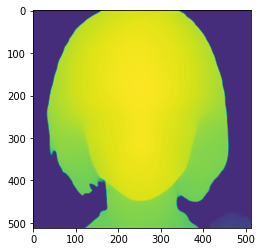

In [167]:
plt.imshow(output)

In [168]:
output=255*output/np.max(output)
cv2.imwrite('fcfa508ce11a3d4475f9c3c52746-output.jpeg',img = cv2.cvtColor(output, cv2.COLOR_GRAY2RGB))

True

## 聊天机器人
https://huggingface.co/liam168/chat-DialoGPT-small-zh

In [235]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

mode_name = 'liam168/chat-DialoGPT-small-zh'
tokenizer = AutoTokenizer.from_pretrained(mode_name)
model = AutoModelForCausalLM.from_pretrained(mode_name)


In [241]:

# Let's chat for 5 lines
for step in range(5):
    # encode the new user input, add the eos_token and return a tensor in Pytorch
    new_user_input_ids = tokenizer.encode('你好呀' + tokenizer.eos_token, return_tensors='pt')

    # append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

    # generated a response while limiting the total chat history to 1000 tokens, 
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # pretty print last ouput tokens from bot
    print("Answer: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))

Answer: 厉害了我的主编
Answer: 哈哈我尽量克制一点
Answer: 哈哈我尽量克制一点
Answer: 挺好看的
Answer: !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


## 问答
https://huggingface.co/yechen/question-answering-chinese

In [11]:
from transformers import pipeline

#question_answerer = pipeline("question-answering", model="yechen/question-answering-chinese")
question_answerer = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")
# 

Some weights of BertModel were not initialized from the model checkpoint at uer/roberta-base-chinese-extractive-qa and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
def extract(context):
    q="公司成立于什么时间"
    create_time = question_answerer(question=q, context=context)
    create_time['question']=q
    print(f"Answer: '{create_time['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
    
    q="公司名称是什么"
    name = question_answerer(question=q, context=context)
    name['question']=q
    print(f"Answer: '{name['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

    q="核心技术是什么"
    tech = question_answerer(question=q, context=context)
    tech['question']=q
    print(f"Answer: '{tech['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

    q="融资阶段是什么，是第几轮融资"
    step = question_answerer(question=q, context=context)
    step['question']=q
    print(f"Answer: '{step['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

    q="融资金额是多少"
    mount = question_answerer(question=q, context=context)
    mount['question']=q
    print(f"Answer: '{mount['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

    q="应用场景是什么，应用在什么领域"
    scene = question_answerer(question=q, context=context)
    scene['question']=q
    print(f"Answer: '{scene['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

    q="用户是哪些人，服务于什么用户"
    user = question_answerer(question=q, context=context)
    user['question']=q
    print(f"Answer: '{user['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

    q="投资方包括哪些"
    fund = question_answerer(question=q, context=context)
    fund['question']=q
    print(f"Answer: '{fund['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
    return {
        "create_time":create_time,
        "name":name,
        "tech":tech,
        "step":step,
        "mount":mount,
        "scene":scene,
        "user":user,
        "fund":fund
    }



In [33]:
context = '''网易首页应用
快速导航
登录
注册免费邮箱
移动端
网易公开课
网易严选
支付
邮箱
网易首页 > 网易号 > 正文申请入驻
ACE虚拟歌姬完成数百万美元融资，虚拟偶像发展规模及趋势解读
2021-09-09 11:28:16　来源: 艾媒网举报
0
分享至
据艾媒网(www.iimedia.cn)获悉，ACE虚拟歌姬于近日完成数百万美元Pre-A轮融资，本轮融资由知春资本领投，老股东五源资本继续跟投。

相关资料显示，ACE虚拟歌姬为时域科技旗下产品，是一款结合了AI歌声合成技术的音乐创作App。ACE虚拟歌姬为用户提供多个AI虚拟歌手，用户可以在ACE的创作工具中，输入歌曲的旋律、歌词，并且选择AI虚拟歌手进行歌曲演唱，“填词玩法”可以让用户在其他用户创作的歌曲旋律上进行二次创作。目前，ACE虚拟歌姬达到了上百万的累计用户。

虚拟歌手，是指在电脑上用歌声合成软件制作，并赋予虚拟二次元形象的歌手，属于虚拟偶像中的一大类。近年来，中国虚拟偶像产业处于持续高速增长的态势中，而近段时间众多明星/代言人接连爆出丑闻，各大品牌商的目光开始瞄向虚拟偶像，可见虚拟偶像未来发展前景较为广阔。

2017-2023年中国虚拟偶像市场规模及预测分析

iiMedia Research(艾媒咨询)的数据显示，2020年中国虚拟偶像核心市场规模为34.6亿元，预计2021年将达到62.2亿元；2020年虚拟偶像带动周边市场规模为645.6亿元，预计2021年为1074.9亿元。艾媒咨询分析师认为，虚拟偶像在内容和周边产品产出方面有着较强的可塑性，能根据时代潮流发展不断开发新的爆点，因此行业增长的延续性较强，未来一段时间内都将保持稳定增长态势。



虚拟偶像产业商业应用案例分析

随着年轻用户逐步开始主导消费市场，虚拟偶像作为深受年轻用户喜爱的元素，已经成为品牌营销发力的风口。各大品牌纷纷着手打造虚拟偶像或是与之进行合作，以期能够与用户进行深度交流，建立好感。



2021中国虚拟偶像爱好者画像



2021中国虚拟偶像爱好者调查：喜好角色

iiMedia Research(艾媒咨询)数据显示，有超过六成的虚拟偶像爱好者喜欢游戏领域的虚拟偶像，其次是影视领域和综艺领域；在喜好角色的男女比例调查中，有61.8%的男性更喜欢男性虚拟偶像角色，而女性也同样更喜欢女性角色。



中国虚拟偶像产业发展趋势与挑战(一)

1、虚拟偶像生产及运营成本高，入局门槛较高

现阶段，国内单支虚拟偶像单曲的制作，包括编曲、建模、形象设计、舞台方案定制等，成本便高达200万元，而流量传播等方面的花费也相当庞大。艾媒咨询分析师认为，虚拟偶像在养成阶段所需要投入的成本要比真人偶像更多，一旦在传播过程中收不到好的效果，很有可能导致投入资金后生产内容无法变现的情况出现，入局门槛较高。

2、头部IP蓬勃发展，但腰部和尾部IP破圈难度较大

由于在目前的市场上，粉丝经济依然是虚拟偶像最重要的变现手段，头部IP主要依靠演出、授权、周边等来获取收益，而腰部和尾部IP由于缺少稳定的粉丝群体，在传播属性上相对较弱，因此无法迅速获得庞大的流量积累，商业化的过程较为艰难。目前，腰部和尾部虚拟偶像IP主要活跃于直播电商、实景应用等场景，由于版权价格较低，品牌更愿意用这些IP替代真人工作，降低劳动力的成本，但也造成了这些IP进一步破圈的难度加大。

特别声明：以上内容(如有图片或视频亦包括在内)为自媒体平台“网易号”用户上传并发布，本平台仅提供信息存储服务。

Notice: The content above (including the pictures and videos if any) is uploaded and posted by a user of NetEase Hao, which is a social media platform and only provides information storage services.

帐号
密码
注册|手机发跟贴登录并发贴
网友评论仅供其表达个人看法，并不表明网易立场。

去跟贴广场看看
相关推荐热点推荐

演唱会上，原来歌手耳朵里戴的不是“耳机”，看完涨知识了
音乐studio 2021-09-25 02:33:16
 453
跟贴 453

《我们的歌3》B组官宣，仅仅举办三届，就面临《歌手》同样的窘境
音乐汪唯一账号 2021-09-25 21:25:54
 1710
跟贴 1710

曾经红极一时的歌手，“飙脏话”遭到了封杀，如今主持农村婚礼
铃铛说娱乐 2021-09-24 19:06:30
 99
跟贴 99

李健发表获奖感言，比舌战群儒还精彩！把总导演都听懵了！丨歌手
稳拿人心 2021-09-23 15:57:17
 0
跟贴 0

想不到吧？白大褂下还可以是戏精说唱歌手，有人还可以靠扔东西挣钱？
四川卫视 2021-09-23 20:22:45
 1
跟贴 1

青岛啤酒IN乐而生校园乐队选拔赛决赛落幕，冠军归属湖泊乐队
红网 2021-09-25 12:04:49
 2
跟贴 2

李克勤近况曝光，媒体透露他去北上发展的原因，原来红日不是重点
春春侃娱 2021-09-23 22:29:33
 2004
跟贴 2004

我不信有人没听过她的歌！
洽洽是你 2021-09-23 22:21:46
 1820
跟贴 1820

好声音导师混战：王靖雯晋级，廖昌永改编惊艳，李克勤失3张王牌
水中烧烤的娱 2021-09-24 23:49:42
 1270
跟贴 1270

怪不得谢霆锋表情异常，原来王菲压根没来现场，天后就这么高傲？
娱乐圈宅急便 2021-09-25 09:48:53
 1858
跟贴 1858

山东一学生因军训顺拐被罚唱歌开口惊艳，获李玉刚点赞！当事人：其实我在给新生表演
潇湘晨报 2021-09-24 18:23:18
 967
跟贴 967

出道几十年没黑料，如今因违反规定、被要求封杀，王力宏冤不冤？
今夜无设防 2021-09-24 21:00:21
 156
跟贴 156

在线音乐杀出个程咬金
人人都是产品经理社区 2021-09-26 10:32:11
 370
跟贴 370

虚拟偶像退环境，从一句「我去！初音未来」开始
BB姬 2021-09-23 00:21:01
 11
跟贴 11

《中国好声音》时尚被淘汰，李克勤战队两强全部走人，这一季悬了
Pipa君 2021-09-25 20:34:26
 0
跟贴 0

他社死多次，现在是“全员恶人”了？
南都娱乐周刊 2021-09-25 02:19:46
 52
跟贴 52

Dota2：Ame狂喜？Dota2官方虚拟偶像要来了！水友：太会整活了
蜻蜓队长Zwj 2021-09-24 14:04:55
 31
跟贴 31

一位音乐制作人去世！PSY.P、深蓝儿童等Rapper发文悼念
嘻笑堂 2021-09-25 02:06:55
 21
跟贴 21

当黄贯中遇上张淇：粤语神改编歌曲《花祭》，尹正全程哭着听完
兔瓜娱乐说 2021-09-23 15:30:40
 145
跟贴 145

周深成立工作室了，恭喜 恭喜!
主持人定杰 2021-09-22 13:20:11
 4
跟贴 4

林志炫不当队长后，似乎没那么烦了！但李承铉跟他PK，可有点吃亏！
综艺大咖秀 2021-09-24 22:49:25
 787
跟贴 787

这一次大湾区晚会后，属于梁汉文的机会或许真的来了
要闻每日关注 2021-09-24 15:46:12
 0
跟贴 0

华为中国园区被扒 英媒：这是全球最奢华的办公室吧？
悦居英国 2021-09-26 01:04:30
 150430
跟贴 150430

陈果演唱歌曲《梦驼铃》，台下父亲听完泪目，太感人了
有料谈综 2021-09-25 11:10:42
 0
跟贴 0

继奥特曼下架之后，广电支持播出优秀动画，双标且没标准答案
要闻每日关注 2021-09-26 00:25:53
 131475
跟贴 131475

3首搞笑改编歌曲配音：哪个大神改得太棒了，笑得我肚子疼
乐坛评论家 2021-09-25 06:13:20
 0
跟贴 0

长尾音乐人最好的出路，可能是去卖保险？|职场观察
中国音乐财经 2021-09-24 22:27:05
 3
跟贴 3

沈腾发现挣钱契机！开始创作歌曲，轰动全国
影视剧全 2021-09-25 08:39:10
 0
跟贴 0

歌曲《路口》，王雷深情演唱，动人歌声听哭李小萌
辽宁欢乐逗 2021-09-25 16:53:48
 0
跟贴 0

在世界的尽头大声地说我＿＿你
南方都市报 2021-09-25 06:50:16
 3
跟贴 3

歌曲《天下》，谢娜张杰夫妻同台献唱，高音部分燃炸全场
辽宁欢乐逗 2021-09-25 17:05:38
 2
跟贴 2

数学家发现音乐的传播曲线和传染病相似，电子音乐的相似度最高
新京报书评周刊 2021-09-26 11:29:43
 0
跟贴 0

数字音乐反垄断后，中小玩家蠢蠢欲动
经济观察报 2021-09-25 09:48:03
 0
跟贴 0

一句震碎他让我热血沸腾
之后的爱情 2021-09-22 17:21:40
 0
跟贴 0

媒体：孟晚舟专机绕飞北极 最后一刻都在提防美国
参考消息 2021-09-26 12:50:33
 40168
跟贴 40168

连续三年获得索尼融资，这家采样公司什么来头？
中国音乐财经 2021-09-24 00:04:26
 12
跟贴 12

3大互联网未解之谜，最神秘的歌曲，诡异的黑白视频！
大胡子艾力 2021-09-22 18:00:00
 23
跟贴 23

元宇宙8大创业方向：虚拟偶像、数字孪生
和牛商业 2021-09-24 17:44:38
 2
跟贴 2

这气质绝了，是民国贵公子本人了#许凯 #歌曲怎叹
丑妆姑娘 2021-09-23 23:21:57
 0
跟贴 0

歌曲《前门情思大碗茶》，曹立深情演唱，歌声清亮宛如天籁
丸子聊剧社 2021-09-25 19:48:11
 0
跟贴 0
艾媒网
艾媒网
艾媒咨询旗下行业资讯网站。
2394
文章数 
2131
关注度
往期回顾全部
体育要闻
1米73战神虐爆欧冠冠军 瓜帅强到离谱
英超-B费打飞点球C罗哑火 曼联主场0-1迎赛季首败
英超-萨拉赫破门+失单刀!利物浦2度领先3-3升班马
英超-热苏斯破僵卢卡库进球被吹 切尔西0-1曼城
法甲-梅西休战 盖耶世界波小德建功!巴黎2-0迎8连胜
娱乐要闻
停更报警，“李子柒”还属于李子柒吗
章子怡谈女儿落泪 称希望她成为一个特别独立的人
恭喜！许昕官宣老婆产二胎 晒女儿拿全运会金牌照
好惨! 尼古拉斯·凯奇被误认是流浪汉遭赶出酒店
陈意涵临盆在即做美甲惹争议，晒正面照双眼皮奇怪
财经要闻
扛不住了？融创绍兴分部向政府发求助信
商务部：多措并举保障国庆假期市场供应
深圳一天4盘齐开，1907套房仅剩2套
上市公司密集宣布限产、停产，怎么回事？
科技要闻
海南版iPhone 13是甜蜜陷阱？
30年内，杨振宁量级的大师中国不会再有了
晚舟归航：最后一刻都在提防美国“出幺蛾子”
2021世界互联网大会乌镇峰会开幕，马斯克等发表精彩观点
立陶宛之后 德国也开始启动调查中国手机
汽车要闻
大5座的TA干啥都在行 新大指挥官e好开不贵
给年轻人更多好选择 昂科威S GS动力好且宜家
全面超越进口版 上汽奥迪A7L预售59.97万起
东风本田全新纯电动SUV或10月21日首发亮相
预售17.58万-21.88万元 库斯途将于今日上市
态度原创
上流 | 测测你是国风几级爱好者？
高度 | 行业首个“分钟级响应”制度 哈啰助力上海城运管理“智变”
公版计划 | 《大地》：美国人演的中国农村封建题材电影
槽值 | 朋友圈社交牛X症患者：一边emo，一边发疯
时尚艺术旅游数码军事航空

水手 薄纱 酷女郎！本季伦敦时装周什么最好看？
太空上新 | 杨紫琪："纽扣"创造了我眼中的"天问一号"
奢侈大牌的月饼到底能有多奇葩？
太空上新 | 胡社光：天宫升空的时候，意味着中国制造升空

© 1997-2021 网易公司版权所有 About NetEase | 公司简介 | 联系方法 | 招聘信息 | 客户服务 | 隐私政策 | 广告服务 | 不良信息举报 Complaint Center | 侵权投诉 Reporting Infringements
'''

In [34]:
res=extract(context)

Answer: '网易', score: 0.0599, start: 79, end: 123
Answer: '网易公司', score: 0.0599, start: 79, end: 123
Answer: '歌声合成技术', score: 0.0599, start: 79, end: 123
Answer: 'A轮融资', score: 0.0599, start: 79, end: 123
Answer: '数百万美元', score: 0.0599, start: 79, end: 123
Answer: '虚拟偶像', score: 0.0599, start: 79, end: 123
Answer: '虚拟偶像', score: 0.0599, start: 79, end: 123
Answer: '知春资本领投', score: 0.0599, start: 79, end: 123


In [31]:
question_answerer(question='本文核心的观点是', context=context)

{'score': 0.007233948912471533, 'start': 854, 'end': 860, 'answer': '虚拟人”风潮'}

In [32]:
question_answerer(question='发生了什么事情？', context=context)

{'score': 0.1296655833721161, 'start': 854, 'end': 861, 'answer': '虚拟人”风潮。'}

## python GUI
https://github.com/beeware/toga

## 情绪分析
https://huggingface.co/finiteautomata/beto-sentiment-analysis

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

In [2]:
result = classifier("I hate you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

result = classifier("I love you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: NEGATIVE, with score: 0.9991
label: POSITIVE, with score: 0.9999


In [3]:
translated_text = translation_zh_en('I hate you')[0]['translation_text']
print(translated_text)
result = classifier(translated_text)[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

NameError: name 'translation_zh_en' is not defined

# 特征提取
句子

>>> # Download vocabulary from huggingface.co and cache.
>>> tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

>>> # Download vocabulary from huggingface.co (user-uploaded) and cache.
>>> tokenizer = AutoTokenizer.from_pretrained('dbmdz/bert-base-german-cased')

>>> # If vocabulary files are in a directory (e.g. tokenizer was saved using `save_pretrained('./test/saved_model/')`)
>>> tokenizer = AutoTokenizer.from_pretrained('./test/bert_saved_model/')

In [12]:
from transformers import pipeline

In [7]:
# your approach
feature_extraction = pipeline('feature-extraction', model="ckiplab/gpt2-base-chinese", tokenizer="ckiplab/gpt2-base-chinese")


7
7


In [13]:
features = feature_extraction("你好呀")
# Note that the output has a weird list output that requires to index with 0.
print(len(features[0])) # 5

5


In [14]:
features[0]

[[-0.3809307813644409,
  -0.13901036977767944,
  -0.2244643121957779,
  -0.01756054162979126,
  -0.16868601739406586,
  0.3296971321105957,
  -0.2411109060049057,
  -0.13960815966129303,
  -0.25006482005119324,
  0.24913153052330017,
  0.40809136629104614,
  -0.12078481167554855,
  -0.037386760115623474,
  0.031496673822402954,
  -0.3758760392665863,
  -0.3874777555465698,
  0.2653636932373047,
  0.20940300822257996,
  -0.08037492632865906,
  0.06945338845252991,
  -0.5406144261360168,
  -0.09513844549655914,
  0.23492014408111572,
  0.12829503417015076,
  0.05687585473060608,
  0.09679553657770157,
  0.6000679135322571,
  0.3515208661556244,
  -0.31639641523361206,
  -0.04691466689109802,
  0.08885284513235092,
  0.30105292797088623,
  0.22089384496212006,
  0.2909100353717804,
  0.42254501581192017,
  -0.30029064416885376,
  -0.09956242144107819,
  -0.166867196559906,
  -0.14804387092590332,
  -0.32846078276634216,
  -0.27136749029159546,
  -0.5316994190216064,
  0.8855500817298889,


In [28]:
#测试
texts=[
    '河北通勤班车坠河已致2死12失联499万新',
    '山西为何遭遇罕见秋汛490万热',
    '印方不合理要求为谈判增加困难479万热',
    '绑架案牵出腐败窝案:76人被处分461万',
    '山西284.96万亩农作物受灾458万新',
    '台风“圆规”向我国靠近445万',
    '山西洪灾建救命文档女孩发声434万新',
    '新氧就侵权明星照片向当事人道歉428万',
    '郑州一网红主播被追征662万税款411万'
]
features=[]
for t in texts:
    feature= feature_extraction(t)
    features.append(feature[0][0])

In [37]:
feature_extraction('山西')

[[[-0.3809307813644409,
   -0.13901036977767944,
   -0.2244643121957779,
   -0.01756054162979126,
   -0.16868601739406586,
   0.3296971321105957,
   -0.2411109060049057,
   -0.13960815966129303,
   -0.25006482005119324,
   0.24913153052330017,
   0.40809136629104614,
   -0.12078481167554855,
   -0.037386760115623474,
   0.031496673822402954,
   -0.3758760392665863,
   -0.3874777555465698,
   0.2653636932373047,
   0.20940300822257996,
   -0.08037492632865906,
   0.06945338845252991,
   -0.5406144261360168,
   -0.09513844549655914,
   0.23492014408111572,
   0.12829503417015076,
   0.05687585473060608,
   0.09679553657770157,
   0.6000679135322571,
   0.3515208661556244,
   -0.31639641523361206,
   -0.04691466689109802,
   0.08885284513235092,
   0.30105292797088623,
   0.22089384496212006,
   0.2909100353717804,
   0.42254501581192017,
   -0.30029064416885376,
   -0.09956242144107819,
   -0.166867196559906,
   -0.14804387092590332,
   -0.32846078276634216,
   -0.27136749029159546,
   -

In [36]:
# 向量检索
features

[[-0.3809307813644409,
  -0.13901036977767944,
  -0.2244643121957779,
  -0.01756054162979126,
  -0.16868601739406586,
  0.3296971321105957,
  -0.2411109060049057,
  -0.13960815966129303,
  -0.25006482005119324,
  0.24913153052330017,
  0.40809136629104614,
  -0.12078481167554855,
  -0.037386760115623474,
  0.031496673822402954,
  -0.3758760392665863,
  -0.3874777555465698,
  0.2653636932373047,
  0.20940300822257996,
  -0.08037492632865906,
  0.06945338845252991,
  -0.5406144261360168,
  -0.09513844549655914,
  0.23492014408111572,
  0.12829503417015076,
  0.05687585473060608,
  0.09679553657770157,
  0.6000679135322571,
  0.3515208661556244,
  -0.31639641523361206,
  -0.04691466689109802,
  0.08885284513235092,
  0.30105292797088623,
  0.22089384496212006,
  0.2909100353717804,
  0.42254501581192017,
  -0.30029064416885376,
  -0.09956242144107819,
  -0.166867196559906,
  -0.14804387092590332,
  -0.32846078276634216,
  -0.27136749029159546,
  -0.5316994190216064,
  0.8855500817298889,


## 命名实体识别
https://universaldependencies.org/u/pos/

In [24]:
ner=pipeline('ner',model="KoichiYasuoka/chinese-bert-wwm-ext-upos",grouped_entities=True)

Some weights of BertModel were not initialized from the model checkpoint at KoichiYasuoka/chinese-bert-wwm-ext-upos and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
ner('你好呀 同学')

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity_group': 'PRON',
  'score': 0.9824743270874023,
  'word': '你',
  'start': 0,
  'end': 1},
 {'entity_group': 'ADJ',
  'score': 0.9068554639816284,
  'word': '好',
  'start': 1,
  'end': 2},
 {'entity_group': 'PART',
  'score': 0.781984269618988,
  'word': '呀',
  'start': 2,
  'end': 3},
 {'entity_group': 'NOUN',
  'score': 0.9990893304347992,
  'word': '同 学',
  'start': 4,
  'end': 6}]

In [38]:


from transformers import AutoTokenizer, AutoModelForMaskedLM
  
tokenizer = AutoTokenizer.from_pretrained("Langboat/mengzi-oscar-base-caption")

model = AutoModelForMaskedLM.from_pretrained("Langboat/mengzi-oscar-base-caption")

("Connection broken: ConnectionResetError(54, 'Connection reset by peer')", ConnectionResetError(54, 'Connection reset by peer'))


OSError: Can't load weights for 'Langboat/mengzi-oscar-base-caption'. Make sure that:

- 'Langboat/mengzi-oscar-base-caption' is a correct model identifier listed on 'https://huggingface.co/models'

- or 'Langboat/mengzi-oscar-base-caption' is the correct path to a directory containing a file named one of pytorch_model.bin, tf_model.h5, model.ckpt.

